<a href="https://colab.research.google.com/github/am610/arXiv_2209.14542/blob/main/GW_RF_arXiv_2209_14542_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### @Ayan Mitra
##### 2022

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
from google.colab import files
import joblib
import io
import logging
logging.getLogger('tensorflow').disabled = True
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA, IncrementalPCA
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import scipy.fftpack
#import hampel
import random
import sklearn
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')
import sys
import seaborn as sns
from pylab import *
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as mpl
from scipy import interpolate
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.decomposition import PCA

column = ['t','orig_w','filt_w','smt_w']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot(i):
  plt.plot(Time.iloc[i],Signal.iloc[i],'.',label='%s'%i)
  plt.legend()
  plt.show()
  plt.close()

In [ ]:
def noise(snr,input):
  target_snr_db = snr
  watts = input**2
  sig_avg_watts = np.mean(watts)
  sig_avg_db = 10 * np.log10(sig_avg_watts)
  # Calculate noise according to [2] then convert to watts
  noise_avg_db = sig_avg_db - target_snr_db
  noise_avg_watts = 10 ** (noise_avg_db / 10)
  # Generate an sample of white noise
  mean_noise = 0
  noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(watts))
  # Noise up the original signal
  x_volts = input
  y_volts = x_volts + noise_volts
  return y_volts

In [ ]:
def noise_power(snr,input):
  # Adding noise using a target noise power
  watts = input**2
  x_volts = input
  # Set a target channel noise power to something very noisy
  target_noise_db = snr
  # Convert to linear Watt units
  target_noise_watts = 10 ** (target_noise_db / 10)

  # Generate noise samples
  mean_noise = 0
  noise_volts = np.random.normal(mean_noise, np.sqrt(target_noise_watts), len(watts))

  # Noise up the original signal (again) and plot
  y_volts = x_volts + noise_volts
  return y_volts

-2.0
6.0


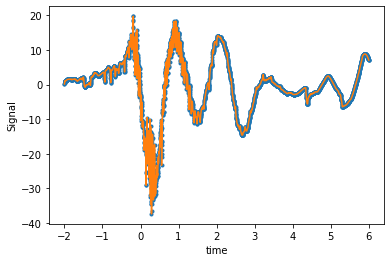

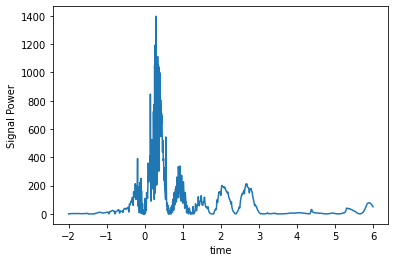

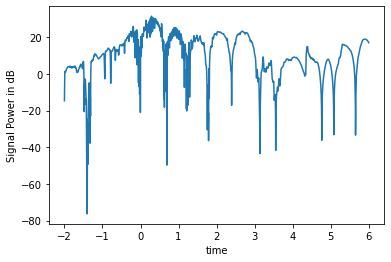

In [ ]:
a = pd.read_csv('drive/MyDrive/ML_Data2.csv')
a.drop([50], axis=0, inplace=True)
a = a.iloc[:, 1:]
Label= a.iloc[:, -1]


Time = a.iloc[:,:10000]
Signal = a.iloc[:, 10000:-1]
a = a.iloc[:,:-1]

label0 = []
label1 = []
label2 = []

for i in Label:
    label0.append(i[1:3])
    label1.append(i[3:6])
    label2.append(i[6:])


#T = Time.iloc[:,1500:5500]
#S = Signal.iloc[:,1500:5500]
xlow=1500
xhigh=5500#3500
T = Time.iloc[:,xlow:xhigh]
S = Signal.iloc[:,xlow:xhigh]

TX = []
TY = []
print(round(np.min(T.iloc[0]),1))
print(round(np.max(T.iloc[0]),1))
xnew = pd.Series(np.linspace((round(np.min(T.iloc[0]),1)),(round(np.max(T.iloc[0]),1)),10000, endpoint=True))
#xnew = pd.Series(np.linspace(-2.0,+6.0,10000, endpoint=True))
for i in range(209):
  tx = T.iloc[i]
  ty = S.iloc[i]
  f1 = interp1d(tx,ty, kind='cubic',fill_value="extrapolate")
  ynew = pd.Series(f1(xnew))
  SNR = 89
  snr_power = 6
  #ynew = pd.Series(noise(SNR,ynew)) # snr adding
  ynew = pd.Series(noise_power(snr_power,ynew)) # snr adding
  TX.append(xnew)
  TY.append(ynew)

TS = pd.concat([pd.DataFrame(TX),pd.DataFrame(TY)],axis=1)
a = TS


X = a
y = np.array(label0).ravel()
y = (y[:]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state=0)


plt.plot(Time.iloc[0,xlow:xhigh],Signal.iloc[0,xlow:xhigh],'.',label='0')
#plt.plot(Time.iloc[0,1500:5500],Signal.iloc[0,1500:5500],'.',label='0')

plt.plot(T.iloc[0],S.iloc[0])
plt.ylabel('Signal')
plt.xlabel('time')
plt.show()
watts = S.iloc[0]**2
plt.plot(T.iloc[0],watts)
plt.ylabel('Signal Power')
plt.xlabel('time')
plt.show()

plt.plot(T.iloc[0],10 * np.log10(watts))
plt.ylabel('Signal Power in dB')
plt.xlabel('time')
plt.show()

In [ ]:
Label

0      s12A1O01
1      s12A1O02
2      s12A1O03
3      s12A1O04
4      s12A1O05
         ...   
205    s75A5O02
206    s75A5O03
207    s75A5O04
208    s75A5O05
209    s75A5O06
Name: Label, Length: 209, dtype: object

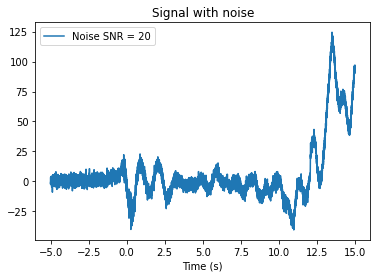

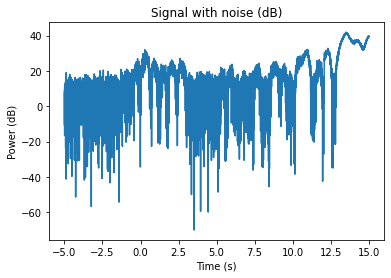

In [ ]:
# Adding noise using target SNR

# Set a target SNR
target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(watts))
# Noise up the original signal
x_volts = S.iloc[0]
y_volts = x_volts + noise_volts

# Plot signal with noise
#plt.subplot(2,1,1)
plt.plot(T.iloc[0], y_volts,label='Noise SNR = %s'%(target_snr_db))
plt.title('Signal with noise')
plt.legend()
#plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()
# Plot in dB
y_watts = y_volts ** 2
y_db = 10 * np.log10(y_watts)
#plt.subplot(2,1,2)
plt.plot(T.iloc[0], 10* np.log10(y_volts**2))
plt.title('Signal with noise (dB)')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

In [ ]:
acc = []
for nc in range(20,45): # PCA
  for ne in range(35,60): # Estimators

    pca_model = PCA(n_components=nc) #120
    X_train_pca = pca_model.fit_transform(X_train)
    X_test_pca = pca_model.transform(X_test)
    model = RandomForestClassifier(n_estimators=ne, random_state=0) # 100
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    tmp = [nc,ne,accuracy_score(y_test, y_pred)]
    #if (accuracy_score(y_test, y_pred)>0.8):
    print(nc,ne, accuracy_score(y_test, y_pred) )
    #print(accuracy_score(y_test, y_pred))
    acc.append(tmp)

20 35 0.6666666666666666
20 36 0.6666666666666666
20 37 0.6666666666666666
20 38 0.6666666666666666
20 39 0.6666666666666666
20 40 0.6666666666666666
20 41 0.6666666666666666
20 42 0.6666666666666666
20 43 0.7142857142857143
20 44 0.7142857142857143
20 45 0.7142857142857143
20 46 0.7142857142857143
20 47 0.7142857142857143
20 48 0.7142857142857143
20 49 0.6666666666666666
20 50 0.6190476190476191
20 51 0.6666666666666666
20 52 0.6666666666666666
20 53 0.6666666666666666
20 54 0.6666666666666666
20 55 0.6666666666666666
20 56 0.6666666666666666
20 57 0.6666666666666666
20 58 0.6666666666666666
20 59 0.6666666666666666
21 35 0.7142857142857143
21 36 0.7142857142857143
21 37 0.7142857142857143
21 38 0.7142857142857143
21 39 0.7142857142857143
21 40 0.7142857142857143
21 41 0.7142857142857143
21 42 0.7142857142857143
21 43 0.7142857142857143
21 44 0.7142857142857143
21 45 0.7142857142857143
21 46 0.7142857142857143
21 47 0.7142857142857143
21 48 0.7142857142857143
21 49 0.7142857142857143


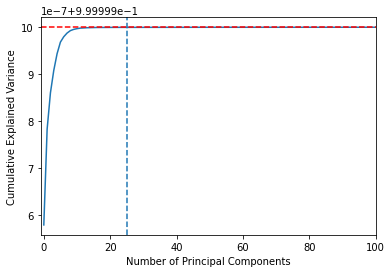

In [ ]:
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(25,linestyle='--')
plt.axhline(1,linestyle='--',c='r')
plt.xlim(-0.9,100)
#plt.ylim(0.9,1.1)
plt.show()

In [ ]:
pca_data = [bestc,beste]
#np.savetxt("drive/MyDrive/GW_PCA_confi_highres.csv", pca_data)

In [ ]:
y_test

array([12, 27, 12, 12, 75, 27, 40, 40, 27, 40, 12, 40, 27, 75, 27, 27, 75,
       12, 27, 12, 75])

In [ ]:
y_pred


array([27, 27, 12, 12, 75, 27, 40, 40, 27, 40, 12, 40, 27, 75, 12, 27, 75,
       12, 40, 12, 75])

In [ ]:
c = 0
for i in range(21):
  print('s',model.predict(np.reshape(X_test_pca[i,:],(1,bestc)))[0],'  s',y_test[i])
  ch = model.predict(np.reshape(X_test_pca[i,:],(1,bestc)))[0]
  if (ch == y_test[i]):
    c +=1
print('%.1f'%(c/i),'Fraction is correct')    

s 27   s 12
s 27   s 27
s 12   s 12
s 12   s 12
s 75   s 75
s 27   s 27
s 40   s 40
s 40   s 40
s 27   s 27
s 40   s 40
s 12   s 12
s 40   s 40
s 27   s 27
s 75   s 75
s 12   s 27
s 27   s 27
s 75   s 75
s 12   s 12
s 40   s 27
s 12   s 12
s 75   s 75
0.9 Fraction is correct


In [ ]:
filename = 'RF_GW_highres_PCA_model.sav'
#joblib.dump(model,  'drive/MyDrive/'+filename )

# Read data and plot

In [ ]:
pca_input = genfromtxt('drive/MyDrive/GW_PCA_confi_highres.csv')
pca_input[0]
bestc = pca_input[0].astype(int)
beste = pca_input[1].astype(int)
filename = 'RF_GW_highres_PCA_model.sav'
loaded_model = joblib.load('drive/MyDrive/'+filename)

#@title
a = pd.read_csv('drive/MyDrive/ML_Data2.csv')
a.drop([50], axis=0, inplace=True)
a = a.iloc[:, 1:]

Label= a.iloc[:, -1]
a = a.iloc[:,:-1]
#print(np.shape(a))
#'''
label0 = []
label1 = []
label2 = []
for i in Label:
    #print(i[1:3])
    label0.append(i[1:3])
    label1.append(i[3:6])
    label2.append(i[6:])
X = a
y = np.array(label0).ravel()
y = (y[:]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state=0)

pca_model = PCA(n_components=pca_input[0].astype(int))
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

a = pd.read_csv('drive/MyDrive/ML_Data2.csv')
a.drop([50], axis=0, inplace=True)
a = a.iloc[:, 1:]
Label= a.iloc[:, -1]
a = a.iloc[:,:-1]
Time = a.iloc[:,:10000]
Signal = a.iloc[:, 10000:-1]

#print(np.shape(a))
#'''
label0 = []
label1 = []
label2 = []
for i in Label:
    #print(i[1:3])
    label0.append(i[1:3])
    label1.append(i[3:6])
    label2.append(i[6:])

T = Time.iloc[:,1500:5500]
S = Signal.iloc[:,1500:5500]

xlow = 1500
xhigh= 5500
#T = Time.iloc[:,xlow:xhigh]
#S = Signal.iloc[:,xlow:xhigh]
#plt.plot(T.iloc[1],S.iloc[1])
#plt.show()

TS = pd.concat([T,S],axis=1)
#print(TS)
gap = np.linspace(0,xhigh-1,2*(xhigh-xlow)).astype(int)
TS.columns = gap
a = TS

#----------
TX = []
TY = []
xnew = pd.Series(np.linspace(-2.0,+6.0,10000, endpoint=True))
xnew = pd.Series(np.linspace((np.min(T.iloc[0])),(np.max(T.iloc[0])),10000, endpoint=True))
for i in range(209):
  tx = T.iloc[i]
  ty = S.iloc[i]
  #plt.plot(tx,ty,c='lime')
  ##plt.show()
  f1 = interp1d(tx,ty, kind='cubic',fill_value="extrapolate")
  ynew = pd.Series(f1(xnew))
  TX.append(xnew)
  TY.append(ynew)
  #plt.plot(xnew,ynew,color='r')
  #plt.show()
TS = pd.concat([pd.DataFrame(TX),pd.DataFrame(TY)],axis=1)
a = TS    
X = a


y = np.array(label0).ravel()
y = (y[:]).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True, random_state=0)

pca_model = PCA(n_components=pca_input[0].astype(int))
X_train_pca = pca_model.fit_transform(X_train)
X_test_pca = pca_model.transform(X_test)

y_pred = loaded_model.predict(X_test_pca)
y_pred_train = loaded_model.predict(X_train_pca)


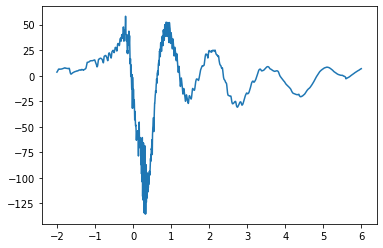

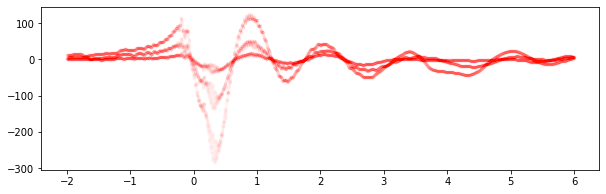

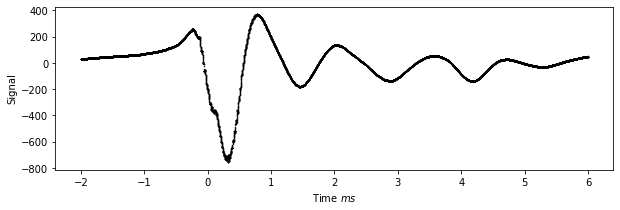

Text(0, 0.5, 'GW-Signal')

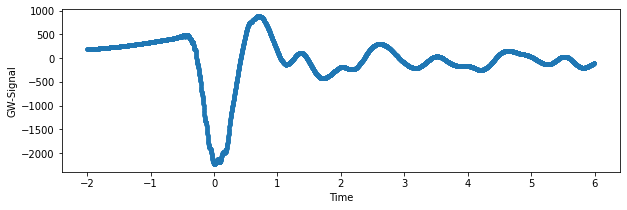

In [ ]:
Time = a.iloc[:,:10000]

Signal = a.iloc[:, 10000:]
plt.plot(T.iloc[1],S.iloc[1])
plt.show()


i = 4
plt.rcParams['figure.figsize'] = [10,3]

for j in range(3):
    plt.plot(Time.iloc[j],Signal.iloc[j],'.',color = (1, j / 30.0, 0, 0.5),alpha=0.009)
#plt.xlim(-1,1)
plt.show()
plt.plot(Time.iloc[i],Signal.iloc[i],'.',c='black',markersize=1)
plt.xlabel('Time $ms$')
plt.ylabel('Signal')
#plt.grid()
plt.show()

plt.plot(Time.iloc[10],Signal.iloc[10],'.')
plt.xlabel('Time')
plt.ylabel('GW-Signal')

In [ ]:
model = loaded_model
c = 0
for i in range(21):
  print('s',model.predict(np.reshape(X_test_pca[i,:],(1,bestc)))[0],'  s',y_test[i])
  ch = model.predict(np.reshape(X_test_pca[i,:],(1,bestc)))[0]
  if (ch == y_test[i]):
    c +=1
print('%.1f'%(c/i),'Fraction is correct')   

print('F1 accuracy: %.1f'%(f1_score(y_pred, y_test, average='macro')))

print(loaded_model.classes_)

s 27   s 12
s 27   s 27
s 12   s 12
s 12   s 12
s 75   s 75
s 27   s 27
s 40   s 40
s 40   s 40
s 27   s 27
s 40   s 40
s 12   s 12
s 40   s 40
s 27   s 27
s 75   s 75
s 12   s 27
s 27   s 27
s 75   s 75
s 12   s 12
s 40   s 27
s 12   s 12
s 75   s 75
0.9 Fraction is correct
F1 accuracy: 0.9
[12 27 40 75]


In [ ]:
#@title
import sklearn.metrics as skm
print('----------------')
print('Test Data ')
print('----------------')
print(skm.classification_report( y_test , y_pred ))
print('----------------')
print('Train Data')
print('----------------')
print(skm.classification_report( y_train , y_pred_train ))

----------------
Test Data 
----------------
              precision    recall  f1-score   support

          12       0.83      0.83      0.83         6
          27       0.83      0.71      0.77         7
          40       0.80      1.00      0.89         4
          75       1.00      1.00      1.00         4

    accuracy                           0.86        21
   macro avg       0.87      0.89      0.87        21
weighted avg       0.86      0.86      0.85        21

----------------
Train Data
----------------
              precision    recall  f1-score   support

          12       1.00      1.00      1.00        46
          27       1.00      1.00      1.00        45
          40       1.00      1.00      1.00        49
          75       1.00      1.00      1.00        48

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



In [ ]:
#@title
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(4,4)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax,cmap="viridis")
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_test, y_pred, loaded_model.classes_, ymap=None, figsize=(5,4))

# Try 3

In [ ]:
# multi-class classification with Keras
import pandas
import numpy as np
import keras
import tensorflow.keras as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.callbacks import Callback
from keras import regularizers

In [ ]:
'''
x_train = np.random.random((1000,20))
y_train = keras.utils.np_utils.to_categorical(np.random.randint(10,size=(1000,1)))
x_test = np.random.random((100,20))
y_test = keras.utils.np_utils.to_categorical(np.random.randint(10,size=(100,1)))
''';

In [ ]:
X
Y = y_train
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Ytest = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_ytest = np_utils.to_categorical(encoded_Ytest)

In [ ]:
model = Sequential()
model.add(Dense(64,activation = 'tanh', input_dim=20000))
model.add(Dropout(0.5))
#model.add(Dense(64,activation='tanh')) #relu
#model.add(Dropout(0.5))
model.add(Dense(4,activation='softplus')) #relu
model.add(Dropout(0.5))
#model.add(Dense(4,activation='tanh')) #relu
#model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

sgd = SGD(lr=0.01, decay = 1e-6,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
#history = model.fit(X_train, dummy_y, validation_data=(X_test, dummy_ytest), epochs=4000, batch_size=50, verbose=1, callbacks=[es, mc])
#callbacks=[callbacks]
history = model.fit(X_train, dummy_y, validation_data=(X_test, dummy_ytest), epochs=10, batch_size=50, verbose=1, callbacks=[callbacks])

# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train, dummy_y, verbose=0)
_, test_acc = saved_model.evaluate(X_test, dummy_ytest, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 64)                1280064   
                                                                 
 dropout_51 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 4)                 260       
                                                                 
 dropout_52 (Dropout)        (None, 4)                 0         
                                                                 
 dense_59 (Dense)            (None, 4)                 20        
                                                                 
Total params: 1,280,344
Trainable params: 1,280,344
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
4/4 [======================

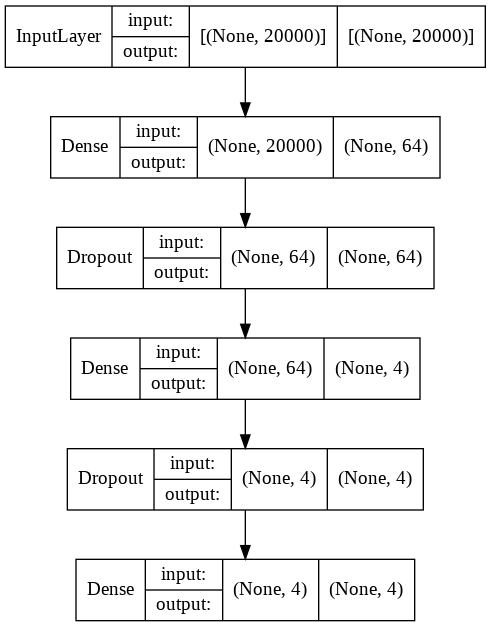

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
print(np.max(history.history['accuracy']))
print(np.min(history.history['loss']))

0.813829779624939
0.4769649803638458


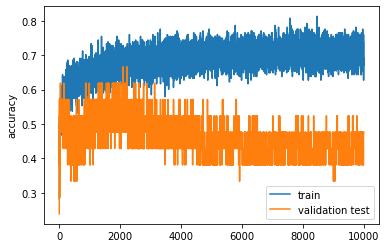

In [ ]:
# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation test')
pyplot.legend()
pyplot.ylabel('accuracy')
pyplot.show()

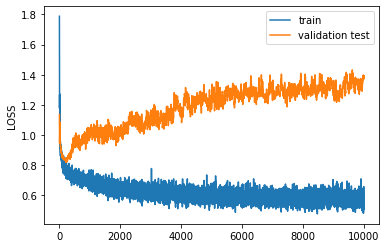

In [ ]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation test')
pyplot.legend()
pyplot.ylabel('LOSS')
pyplot.show()

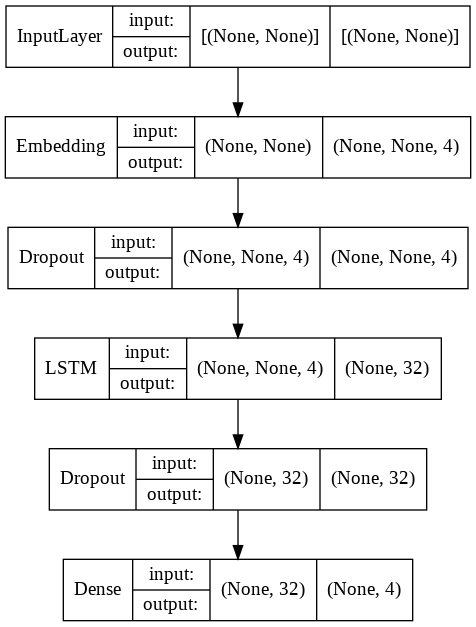

### LSTM

In [ ]:
X_lstm = np.array(TY).reshape((209, 1, 10000))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(1, 10000)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')#,metrics=['accuracy'])
# fit model
history = model.fit(X_lstm, y, epochs=10000, verbose=2)
print(model.summary())

Streaming output truncated to the last 5000 lines.
Epoch 7509/10000
7/7 - 0s - loss: 43.2738 - 215ms/epoch - 31ms/step
Epoch 7510/10000
7/7 - 0s - loss: 42.2329 - 206ms/epoch - 29ms/step
Epoch 7511/10000
7/7 - 0s - loss: 43.9375 - 210ms/epoch - 30ms/step
Epoch 7512/10000
7/7 - 0s - loss: 43.0142 - 207ms/epoch - 30ms/step
Epoch 7513/10000
7/7 - 0s - loss: 42.9614 - 199ms/epoch - 28ms/step
Epoch 7514/10000
7/7 - 0s - loss: 42.8877 - 206ms/epoch - 29ms/step
Epoch 7515/10000
7/7 - 0s - loss: 43.0132 - 201ms/epoch - 29ms/step
Epoch 7516/10000
7/7 - 0s - loss: 42.7518 - 200ms/epoch - 29ms/step
Epoch 7517/10000
7/7 - 0s - loss: 42.9125 - 200ms/epoch - 29ms/step
Epoch 7518/10000
7/7 - 0s - loss: 42.6194 - 203ms/epoch - 29ms/step
Epoch 7519/10000
7/7 - 0s - loss: 42.9656 - 214ms/epoch - 31ms/step
Epoch 7520/10000
7/7 - 0s - loss: 42.7070 - 203ms/epoch - 29ms/step
Epoch 7521/10000
7/7 - 0s - loss: 42.6255 - 198ms/epoch - 28ms/step
Epoch 7522/10000
7/7 - 0s - loss: 43.1632 - 201ms/epoch - 29ms/st

In [ ]:
# 209,1,10000
print(np.shape(X_lstm),np.shape(y))

(209, 1, 10000) (209,)


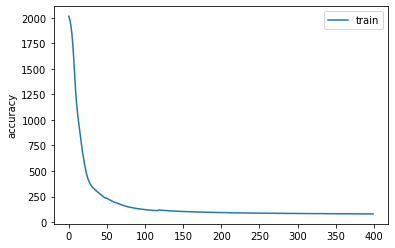

In [ ]:
# plot training history
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_accuracy'], label='validation test')
pyplot.legend()
pyplot.ylabel('accuracy')
pyplot.show()

In [ ]:
# demonstrate prediction
c=0
for i in range(209):
  x_input = np.array(TY[i])#array([[70,75,145], [80,85,165], [90,95,185]])
  x_input = x_input.reshape((1, 1, 10000))
  yhat = model.predict(x_input, verbose=0)
  print(int(yhat),'  ',y[i])
  if(int(yhat)==y[i]):
    c+=1
print((c/209.)*100)

26    12
26    12
26    12
26    12
25    12
24    12
24    12
27    12
28    12
28    12
24    12
21    12
18    12
19    12
30    12
23    12
26    12
26    12
26    12
25    12
24    12
24    12
29    12
29    12
29    12
17    12
9    12
12    12
11    12
26    12
26    12
25    12
24    12
24    12
26    12
23    12
18    12
26    12
26    12
25    12
27    12
28    12
24    12
18    12
11    12
12    12
26    12
26    12
25    12
27    12
12    12
16    12
26    27
26    27
26    27
26    27
26    27
24    27
24    27
28    27
28    27
28    27
24    27
29    27
29    27
27    27
29    27
30    27
26    27
26    27
26    27
26    27
24    27
27    27
29    27
24    27
29    27
30    27
22    27
24    27
26    27
26    27
26    27
25    27
24    27
29    27
31    27
29    27
28    27
26    27
26    27
26    27
27    27
28    27
31    27
29    27
27    27
27    27
26    27
26    27
26    27
27    27
28    27
24    27
26    40
26    40
26    40
26    40
26    40
24    40
24    40
28

In [ ]:
#model.compile(optimizer=sgd,loss = 
 #             tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
print(model.metrics_names)

['loss']


In [ ]:
print(model.metrics_names)
score = model.evaluate(X_test, dummy_ytest, batch_size=200)
print(score)

['loss', 'accuracy']
1/1 [==============================] - 0s 45ms/step - loss: 1.7014 - accuracy: 0.4286
[1.7013713121414185, 0.4285714328289032]


In [ ]:
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(256,activation = 'tanh', input_dim=20000))
  model.add(Dropout(0.5))
  model.add(Dense(256,activation='tanh')) #relu
  model.add(Dropout(0.5))
  model.add(Dense(64,activation='softplus')) #relu
  model.add(Dropout(0.1))
  model.add(Dense(64,activation='tanh')) #relu
  model.add(Dropout(0.5))
  model.add(Dense(4,activation='softmax'))
 
  sgd = SGD(lr=0.01, decay = 1e-6,momentum=0.9,nesterov=True)	# Compile model
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  # checkpoint
  #filepath="drive/MyDrive/weights.best_RF_GW.hdf5"
  #checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
  #callbacks_list = [checkpoint]
 	
  return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=2020, batch_size=2, verbose=2)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



Epoch 1/2020
85/85 - 2s - loss: 1.4271 - accuracy: 0.4260 - 2s/epoch - 28ms/step
Epoch 2/2020
85/85 - 2s - loss: 1.2487 - accuracy: 0.4852 - 2s/epoch - 20ms/step
Epoch 3/2020
85/85 - 2s - loss: 1.1743 - accuracy: 0.4556 - 2s/epoch - 20ms/step
Epoch 4/2020
85/85 - 2s - loss: 1.1716 - accuracy: 0.5030 - 2s/epoch - 20ms/step
Epoch 5/2020
85/85 - 2s - loss: 1.0711 - accuracy: 0.4556 - 2s/epoch - 21ms/step
Epoch 6/2020
85/85 - 2s - loss: 1.0298 - accuracy: 0.5148 - 2s/epoch - 20ms/step
Epoch 7/2020
85/85 - 2s - loss: 1.1856 - accuracy: 0.4320 - 2s/epoch - 20ms/step
Epoch 8/2020
85/85 - 2s - loss: 1.1117 - accuracy: 0.4852 - 2s/epoch - 20ms/step
Epoch 9/2020
85/85 - 2s - loss: 0.9967 - accuracy: 0.5089 - 2s/epoch - 20ms/step
Epoch 10/2020
85/85 - 2s - loss: 0.9679 - accuracy: 0.5148 - 2s/epoch - 20ms/step
Epoch 11/2020
85/85 - 2s - loss: 1.0519 - accuracy: 0.4260 - 2s/epoch - 21ms/step
Epoch 12/2020
85/85 - 2s - loss: 0.9596 - accuracy: 0.4852 - 2s/epoch - 20ms/step
Epoch 13/2020
85/85 - 2s 

KeyboardInterrupt: ignored

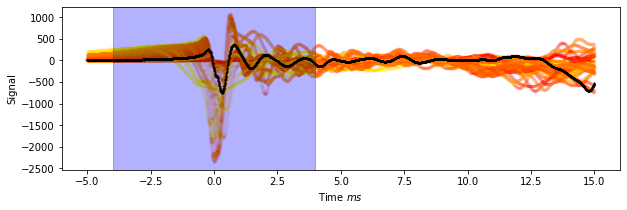

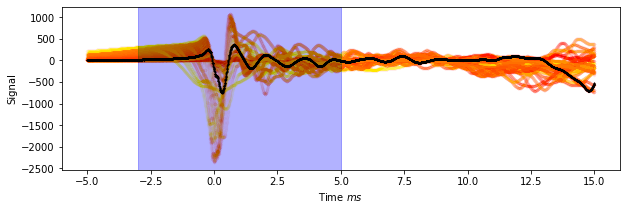

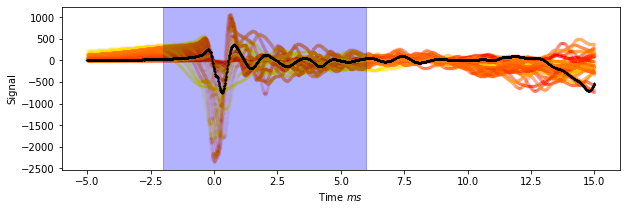

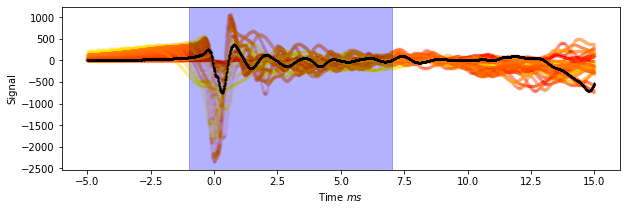

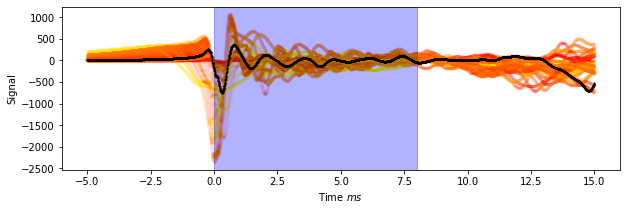

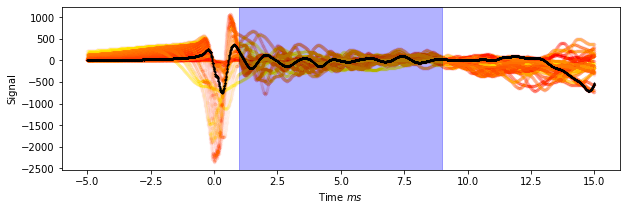

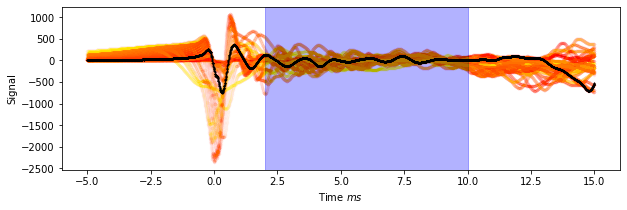

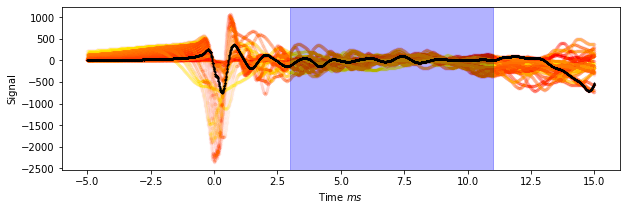

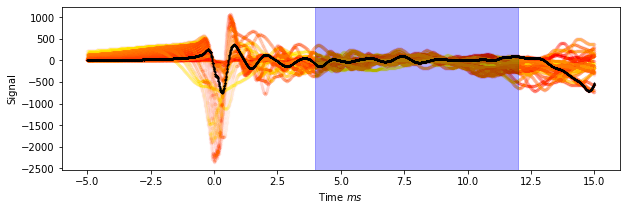

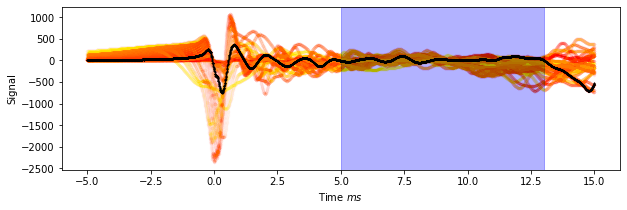

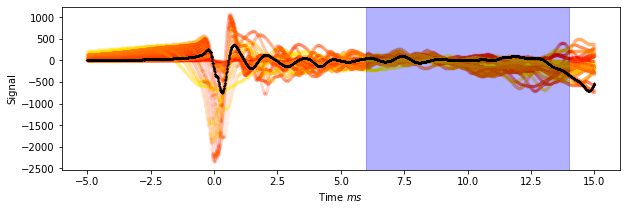

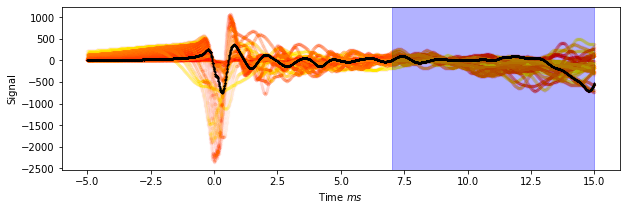

In [ ]:
c = -4;gap = 8;
for i in range(12):
  
  i = 4
  plt.rcParams['figure.figsize'] = [10,3]

  for j in range(30):
      plt.plot(Time.iloc[j],Signal.iloc[j],'.',color = (1, j / 30.0, 0, 0.5),alpha=0.009)
  #plt.xlim(-1,1)
  plt.plot(Time.iloc[i],Signal.iloc[i],'.',c='black',markersize=1)
  plt.xlabel('Time $ms$')
  plt.ylabel('Signal')
  plt.axvspan(c, c+gap, alpha=0.3, color='b')
  c +=1
  plt.show()
#plt.grid()